# Examen de Sistemas Inteligentes 2024
## Parte práctica
### Nombre del alumno

Pon aquí tu nombre.

***

**Instrucciones:** Carga el fichero mushroom.csv, y contexta las preguntas debajo de los encabezados.


### Ejercicio 1

### Ejercicio 2

In [2]:
#code here
## importamos la librerias necesarias
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.impute import SimpleImputer

dfOriginal = pd.read_csv('mushroom.csv')
countNaN = dfOriginal.isna().sum()
print(countNaN) # Para ver cuantos NaN hay en cada columna. como hay poca perdida y tenemos muchos datos, podemos eliminar las filas con NaN
dfOriginal = dfOriginal.dropna()

display(dfOriginal) ## Como estan los datos sin ningun tipo de limpieza
# Para categorizar los datos usando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Transformamor las columnas que queremos categorizar a numpy para que funcione OHE
cap_shape = dfOriginal["cap-shape"].to_numpy()
gill_attachment = dfOriginal["gill-attachment"].to_numpy()
gill_color = dfOriginal["gill-color"].to_numpy()
stem_color = dfOriginal["stem-color"].to_numpy()

# Aplicamos OHE a las columnas
cap_shapeOHE = encoder.fit_transform(cap_shape.reshape(-1,1))
gill_attachmentOHE = encoder.fit_transform(gill_attachment.reshape(-1,1))
gill_colorOHE = encoder.fit_transform(gill_color.reshape(-1,1))
stem_colorOHE = encoder.fit_transform(stem_color.reshape(-1,1))

# Dropeamos las columnas originales
dfOriginal = dfOriginal.drop(columns=["cap-shape","gill-attachment","gill-color","stem-color"])
display(dfOriginal) ## Como estan los datos sin las columnas categorizadas

Y = dfOriginal["class"]
dfOriginal = dfOriginal.drop(columns=["class"])

X = dfOriginal.to_numpy()
print(X.shape)
X = np.hstack((X,cap_shapeOHE,gill_attachmentOHE,gill_colorOHE,stem_colorOHE)) ## Concatenamos las columnas categorizadas
print(X.shape)

# Normalizamos los datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# comprobamos que se han normalizado correctamente
print(X)

## Dividimos los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


cap-diameter       2
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         2
stem-color         0
season             0
class              0
dtype: int64


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1371.0,2,2,10,3.807467,1545.0,11,1.804273,1
1,1461.0,2,2,10,3.807467,1557.0,11,1.804273,1
2,1371.0,2,2,10,3.612496,1566.0,11,1.804273,1
3,1261.0,6,2,10,3.787572,1566.0,11,1.804273,1
4,1305.0,6,2,10,3.711971,1464.0,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73.0,5,3,2,0.887740,569.0,12,0.943195,1
54031,82.0,2,3,2,1.186164,490.0,12,0.943195,1
54032,82.0,5,3,2,0.915593,584.0,12,0.888450,1
54033,79.0,2,3,2,1.034963,491.0,12,0.888450,1


,cap-diameter,stem-height,stem-width,season,class
0,1371.0,3.807467,1545.0,1.804273,1
1,1461.0,3.807467,1557.0,1.804273,1
2,1371.0,3.612496,1566.0,1.804273,1
3,1261.0,3.787572,1566.0,1.804273,1
4,1305.0,3.711971,1464.0,0.943195,1
...,...,...,...,...,...
54030,73.0,0.887740,569.0,0.943195,1
54031,82.0,1.186164,490.0,0.943195,1
54032,82.0,0.915593,584.0,0.888450,1
54033,79.0,1.034963,491.0,0.888450,1


(54031, 4)
(54031, 43)
[[0.72501322 0.99273698 0.43289437 ... 0.         1.         0.        ]
 [0.77260709 0.99273698 0.43625665 ... 0.         1.         0.        ]
 [0.72501322 0.94189582 0.43877837 ... 0.         1.         0.        ]
 ...
 [0.0433633  0.23864218 0.16363127 ... 0.         0.         1.        ]
 [0.04177684 0.26976942 0.13757355 ... 0.         0.         1.        ]
 [0.03807509 0.30193424 0.13785374 ... 0.         0.         1.        ]]


### Ejercicio 3

In [4]:
#code here
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# para obtener mejor resultado ir tocando los parametros y ver que obtenemos
model = MLPClassifier(hidden_layer_sizes=(20), learning_rate_init=0.001, alpha=0.01, max_iter=1000, verbose=True)
model.fit(X_train,Y_train)
## Predecimos los datos de test
Y_pred_sklearn = model.predict(X_test)
ac = accuracy_score(Y_pred_sklearn,Y_test)
print(ac)

Iteration 1, loss = 0.62471292
Iteration 2, loss = 0.50384087
Iteration 3, loss = 0.44028768
Iteration 4, loss = 0.39283942
Iteration 5, loss = 0.35552841
Iteration 6, loss = 0.32582436
Iteration 7, loss = 0.30331712
Iteration 8, loss = 0.28506929
Iteration 9, loss = 0.27056795
Iteration 10, loss = 0.25892082
Iteration 11, loss = 0.24906486
Iteration 12, loss = 0.24099499
Iteration 13, loss = 0.23345024
Iteration 14, loss = 0.22699197
Iteration 15, loss = 0.22126856
Iteration 16, loss = 0.21598691
Iteration 17, loss = 0.21114506
Iteration 18, loss = 0.20675586
Iteration 19, loss = 0.20257055
Iteration 20, loss = 0.19860983
Iteration 21, loss = 0.19498755
Iteration 22, loss = 0.19134296
Iteration 23, loss = 0.18813843
Iteration 24, loss = 0.18514163
Iteration 25, loss = 0.18233076
Iteration 26, loss = 0.17944328
Iteration 27, loss = 0.17686089
Iteration 28, loss = 0.17400285
Iteration 29, loss = 0.17145399
Iteration 30, loss = 0.16886835
Iteration 31, loss = 0.16671044
Iteration 32, los

### Ejercicio 4

In [5]:
#code here
from sklearn.ensemble import RandomForestClassifier
# para obtener mejor resultado ir tocando los parametros y ver que obtenemos
clf = RandomForestClassifier(n_estimators=400, max_depth=15, random_state=42)
clf.fit(X_train,Y_train)

Y_pred_RFC = clf.predict(X_test)
ac = accuracy_score(Y_pred_RFC,Y_test)
print(ac)

0.9854723790136023


### Ejercicio 5

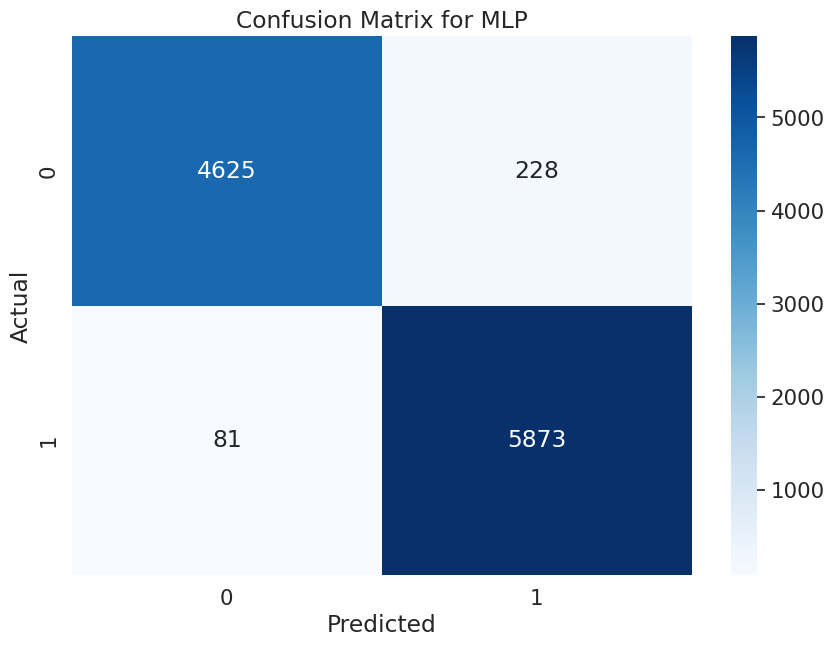

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      4853
           1       0.96      0.99      0.97      5954

    accuracy                           0.97     10807
   macro avg       0.97      0.97      0.97     10807
weighted avg       0.97      0.97      0.97     10807



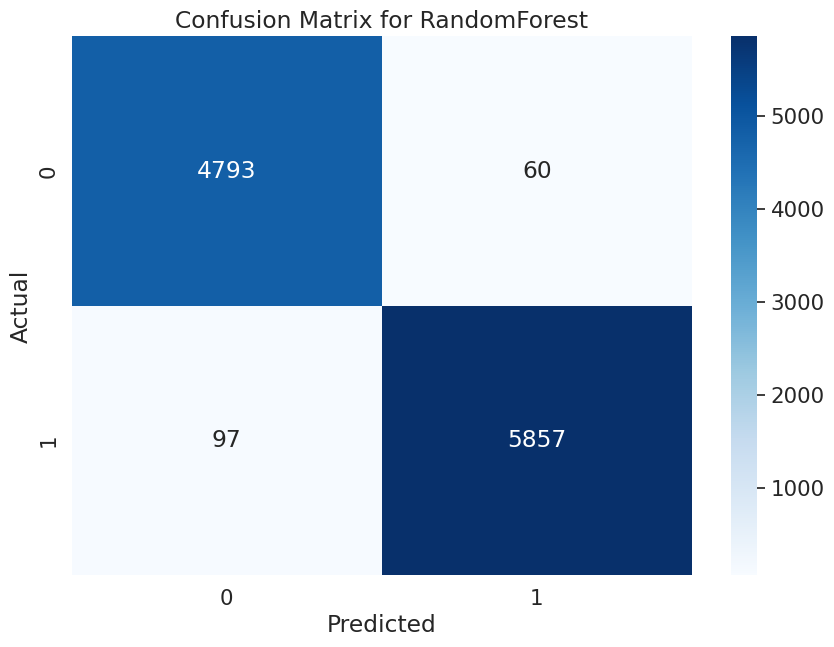

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4853
           1       0.99      0.98      0.99      5954

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [8]:
#code here
# Matriz de confusion para sklearn MLP
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

cm_sklearn = confusion_matrix(Y_test,Y_pred_sklearn)
cm_sklearn_df = pd.DataFrame(cm_sklearn, index=model.classes_, columns=model.classes_)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cm_sklearn_df, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for MLP")
plt.show()
print(classification_report(Y_test, Y_pred_sklearn))

# Matriz de confusion para RandomForest
cm_RFC = confusion_matrix(Y_test,Y_pred_RFC)
cm_RFC_df = pd.DataFrame(cm_RFC, index=clf.classes_, columns=clf.classes_)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(cm_RFC_df, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RandomForest")
plt.show()
print(classification_report(Y_test, Y_pred_RFC))

En este caso, teniendo en cuenta que tratamos con problemas de salud como puede ser comerse una seta venenosa elegiria el uso de un Random Forest ya que tiene mayor precision y accuracy a la hora de detectar si una seta es venenosa o no. RF es mas rapido de entrenar y es mas facil de explicar que una red de neuronas y teniendo en cuenta que puede hacer falta explicar la causa de la claficacion RF hace que sea mas sencillo

### EXTRAS

#### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state=42, max_depth=15, criterion="gini")
decision_tree.fit(X_train,Y_train)

Y_pred_DT = decision_tree.predict(X_test)
ac = accuracy_score(Y_pred_DT,Y_test)
print(ac)


0.9630794855186453
